In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import roc_curve, auc

1.	Import the dataset: Load the data into your analysis environment.

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Data mining/project /Mariam_project_V2/Titanic_data.csv')

In [13]:
print(df.shape)

(891, 12)


2.	Display records: Show the first 5 and last 5 records of the dataset.

In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Last 5 rows of the dataset

In [17]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


3.	Identify data types: Check and note the data types for each variable.

In [18]:
# Check data types of each column
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


 I dropped the 'Name', 'PassengerId', and 'Ticket' columns because they don't impact survival prediction. These columns are identifiers or unique values, which don't add value to the model. This helps streamline the dataset for better prediction.

In [19]:
 # Drop columns that won't be used for prediction
df = df.drop(columns=['Name', 'PassengerId', 'Ticket'])

4.	Missing entries: Determine the number of missing entries per variable.

In [20]:
missing_values = df.isnull().sum()

In [21]:
print(missing_values)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


## Missing Values

Age: 177 missing values. We will replace these missing values with the mean of the available Age data.


Cabin: 687 missing values (most passengers do not have a recorded cabin).

This column has a large number of missing values, making it less useful for predictive modeling without significant imputation, so we will remove it.


Embarked: 2 missing values. We will replace these with the most frequent value (mode) from the Embarked column.

In [23]:
# Impute Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Impute Embarked with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-23-3f6f2e2ddd74>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-23-3f6f2e2ddd74>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [24]:
# Confirm missing values are handled
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


5.	Duplicate records: Identify and count any duplicate records.

In [25]:
duplicate_records = df.duplicated().sum()


There is no duplication in the dataset

In [ ]:
print(duplicate_records)

111


In [26]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

6.	Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

<ipython-input-28-16af46b16cde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['#DDA0DD', '#9370DB'])  # Light and dark purple


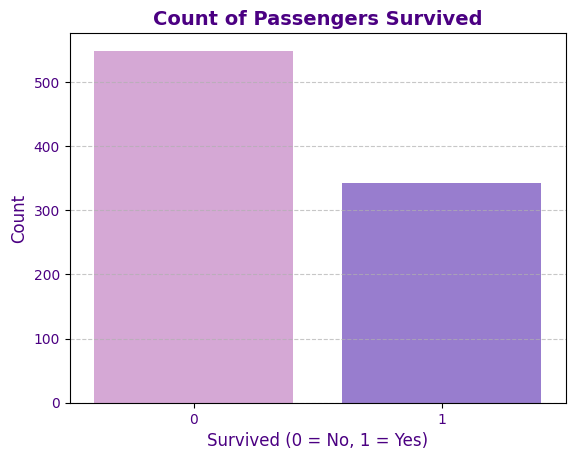

In [28]:
# Univariate analysis for 'Survived' with shades of purple
sns.countplot(x='Survived', data=df, palette=['#DDA0DD', '#9370DB'])  # Light and dark purple
plt.title('Count of Passengers Survived', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Count', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()


<ipython-input-29-fbc0f5753241>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB'])  # Light to dark purple shades


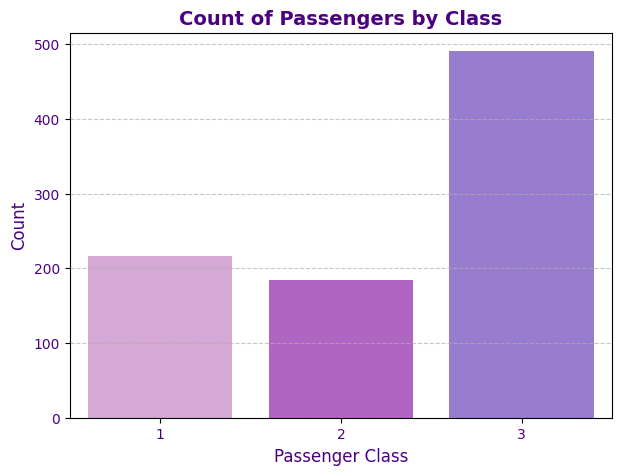

In [29]:
plt.figure(figsize=(7, 5))

# Univariate analysis for 'Pclass' with shades of purple
sns.countplot(x='Pclass', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB'])  # Light to dark purple shades
plt.title('Count of Passengers by Class', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Passenger Class', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Count', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()


<ipython-input-30-01b32d67a824>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=['#DDA0DD', '#9370DB'])  # Light and dark purple for gender


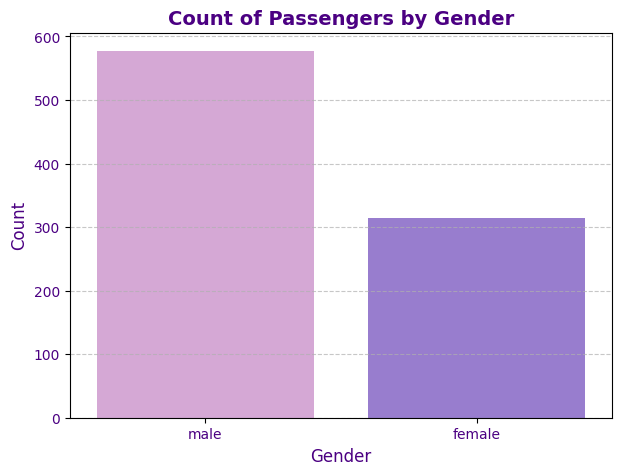

In [30]:
plt.figure(figsize=(7, 5))

# Univariate analysis for 'Sex' with shades of purple
sns.countplot(x='Sex', data=df, palette=['#DDA0DD', '#9370DB'])  # Light and dark purple for gender
plt.title('Count of Passengers by Gender', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Gender', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Count', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()


<ipython-input-31-d604f444cea0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB', '#8A2BE2', '#4B0082'])  # Various purple shades
<ipython-input-31-d604f444cea0>:4: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='SibSp', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB', '#8A2BE2', '#4B0082'])  # Various purple shades


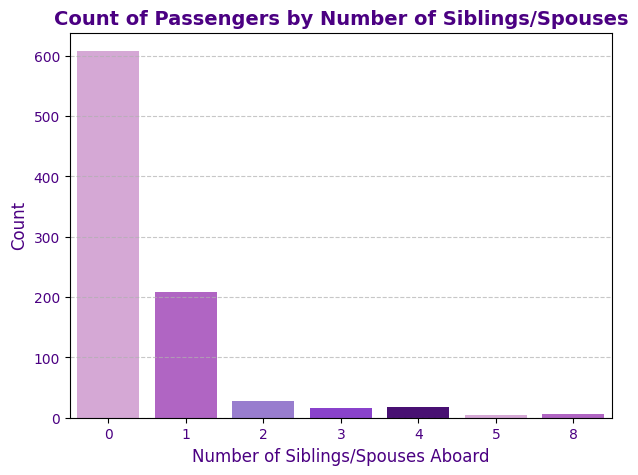

In [31]:
plt.figure(figsize=(7, 5))

# Univariate analysis for 'SibSp' with shades of purple
sns.countplot(x='SibSp', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB', '#8A2BE2', '#4B0082'])  # Various purple shades
plt.title('Count of Passengers by Number of Siblings/Spouses', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Number of Siblings/Spouses Aboard', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Count', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()

<ipython-input-32-c563d7beeb6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB'])  # Light to dark purple shades


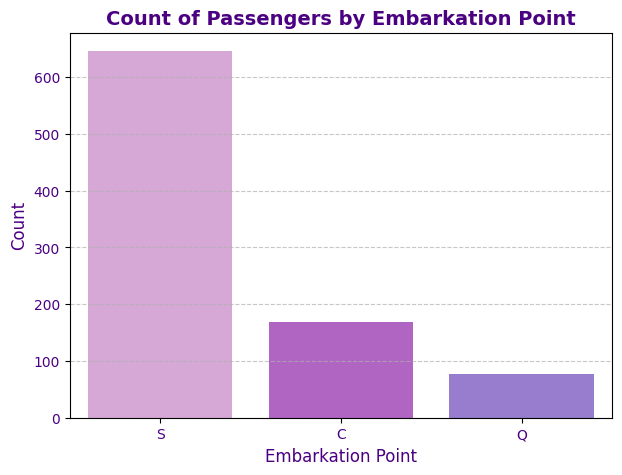

In [32]:
# Set up the figure
plt.figure(figsize=(7, 5))

# Univariate analysis for 'Embarked' with shades of purple
sns.countplot(x='Embarked', data=df, palette=['#DDA0DD', '#BA55D3', '#9370DB'])  # Light to dark purple shades
plt.title('Count of Passengers by Embarkation Point', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Embarkation Point', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Count', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()

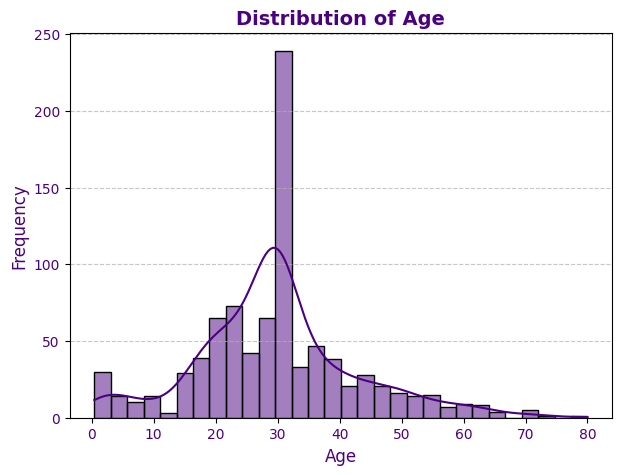

In [33]:
plt.figure(figsize=(7, 5))

# Univariate analysis for 'Age' with dark purple color
sns.histplot(df['Age'], bins=30, kde=True, color='#4B0082')  # Dark purple for the histogram
plt.title('Distribution of Age', fontsize=14, fontweight='bold', color='#4B0082')  # Dark purple title
plt.xlabel('Age', fontsize=12, color='#4B0082')  # Dark purple labels
plt.ylabel('Frequency', fontsize=12, color='#4B0082')  # Dark purple labels
plt.xticks(color='#4B0082')  # Dark purple ticks
plt.yticks(color='#4B0082')  # Dark purple ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for y-axis
plt.show()

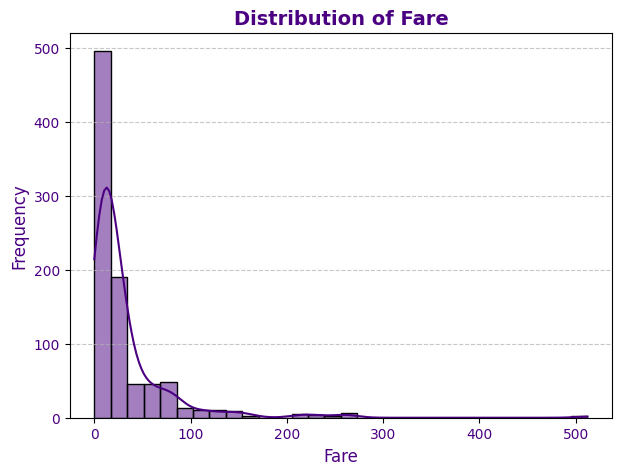

In [34]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='#4B0082')
plt.title('Distribution of Fare', fontsize=14, fontweight='bold', color='#4B0082')
plt.xlabel('Fare', fontsize=12, color='#4B0082')
plt.ylabel('Frequency', fontsize=12, color='#4B0082')
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7.outlier detection Using the Tukey method to identify outliers.


In [35]:
# Specify the numeric columns of interest
numeric_columns = ['Age', 'Fare']

# Calculate Q1, Q3, and IQR for Age and Fare
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers for Age and Fare
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))

# Count the number of outliers for each variable
outlier_counts = outliers.sum()
print(outlier_counts)


Age      66
Fare    116
dtype: int64


Same but with box blot to visulaization

Age      66
Fare    116
dtype: int64


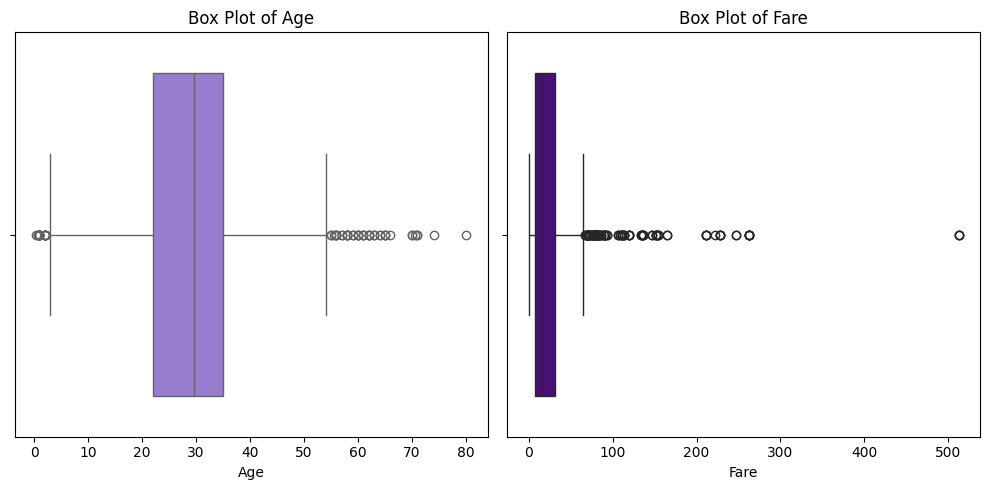

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the numeric columns of interest
numeric_columns = ['Age', 'Fare']

# Calculate Q1, Q3, and IQR for Age and Fare
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers for Age and Fare
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))

# Count the number of outliers for each variable
outlier_counts = outliers.sum()
print(outlier_counts)

# Create box plots for 'Age' and 'Fare' to visualize outliers
plt.figure(figsize=(10, 5))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='#9370DB')  # Purple theme for the box plot
plt.title('Box Plot of Age')

# Box plot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'], color='#4B0082')  # Darker purple for the second box plot
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()


# 8.	Bivariate analysis

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

*  8.1.Chi-square test for independence between two categorical variables

In [38]:
# we first create the contigency table these are the real values in the dataset
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(contingency_table)

Survived    0    1
Sex               
female     81  233
male      468  109


**Result contigency table**

The contingency table shows that a larger proportion of females (233) survived compared to males (109), while more males did not survive (468) than females (81). This suggests a possible relationship between gender and survival

I used the ***Chi-square *** test for independence to determine if there is a significant relationship between two categorical variables: 'Sex' and 'Survived.'
The code compares the observed counts in the contingency table with the expected counts assuming no association

In [39]:
# Now we perform the chi-squared mpares the observed counts in the contingency table with the counts we would expect if there were no relationship between Sex and Survived
#If the observed and expected counts are significantly different, we reject the null hypothesis.

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 value: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')



Chi2 value: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of Freedom: 1


# here we have p value less then 0.05 so reject H0 and accept H1 so which means there is an association between sex and survived

I ran this step to check if there’s a relationship between the number of siblings/spouses aboard and survival.

In [40]:
# we first create the contigency table these are the real values in the dataset
contingency_table = pd.crosstab(df['SibSp'], df['Survived'])
print(contingency_table)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [41]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 value: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')



Chi2 value: 37.2717929152043
p-value: 1.5585810465902147e-06
Degrees of Freedom: 6


**p-value **bold text** (1.56e-06) **is very small, This suggests that having siblings or spouses aboard did have an impact on survival rates.[link text](https://)

# also here we have p value less then 0.05 so reject H0 and accept H1 so which means there is an association between SibSp and survived


## 8.2 -	Correlation analysis to examine relationships between two numeric variables

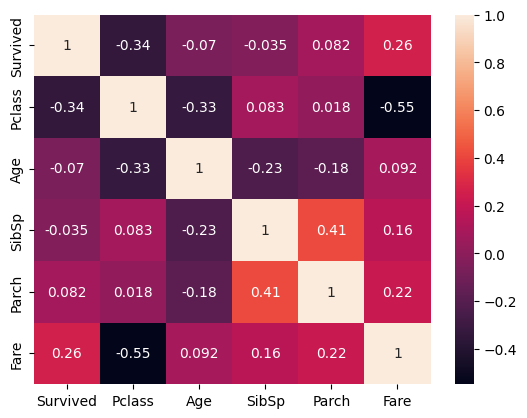

In [44]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


From the heatmap, the variables most strongly related to survival are:


**Pclass**: It has a negative correlation (**-0.34**) with survival, meaning passengers in lower classes (higher Pclass numbers) were less likely to survive.
Reason: Higher-class passengers (1st class) had better access to lifeboats and were prioritized during the evacuation.


**Fare**: It has a positive correlation **(0.26**) with survival, indicating that passengers who paid higher fares were more likely to survive.
Reason: Higher fare-paying passengers were generally in higher classes, with better cabin locations and priority during evacuation.

-	# 8.3 T-test or Mann-Whitney U test to compare means between two groups.

here we have more then 2 groups o or 1 i will use anova with continuous variable (Age)

In [45]:
# Survived is a categorical variable
#area is a numerical variable

# Separate the data into two groups based on the categorical variable
group_0 = df[df['Survived'] == 0]['Age']
group_1 = df[df['Survived'] == 1]['Age']

# Perform the t-test
t_stat, p_val = ttest_ind(group_1, group_0)
print(f"T-test statistic: {t_stat}, p-value: {p_val}")


T-test statistic: -2.0865081090373168, p-value: 0.03721708372685034


SAme result  but use **violinplot** for visulization

<ipython-input-46-374d0bb644cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette=['#9370DB', '#4B0082'])  # Using shades of purple


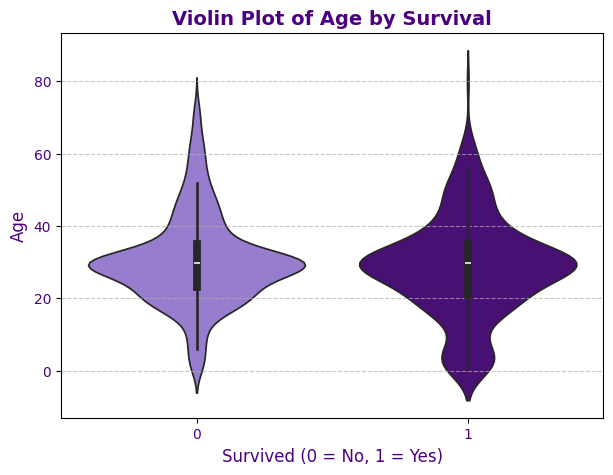

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot
plt.figure(figsize=(7, 5))
sns.violinplot(x='Survived', y='Age', data=df, palette=['#9370DB', '#4B0082'])  # Using shades of purple
plt.title('Violin Plot of Age by Survival', fontsize=14, fontweight='bold', color='#4B0082')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12, color='#4B0082')
plt.ylabel('Age', fontsize=12, color='#4B0082')
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

p-value (0.0372) is less than 0.05, so we will reject the null hypothesis. This indicates that there is statistically significant evidence to suggest that the means of the two groups you are comparing are different.

# 8.4 -	Analysis of Variance (ANOVA) to compare means across multiple groups.

In [ ]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

here we have more then 2 groups so i will use anova test

In [ ]:
# Separate the data into groups based on the number of bedrooms
group_1 = df[df['Embarked'] == 'S']['Age']
group_2 = df[df['Embarked'] == 'C']['Age']
group_3 = df[df['Embarked'] == 'Q']['Age']


# Perform one-way ANOVA
f_stat, p_val = f_oneway(group_1, group_2, group_3)

# Print the results
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 0.49355314720610666, p-value: 0.6106208625564047


The p-value (0.6106) is much greater than 0.05, so fail to reject the null hypothesis. This suggests that there is no statistically significant evidence to indicate that the means of the groups being compared are different.

In [ ]:
df["Pclass"].unique() # also here we have 3 classes so will use anova test

array([3, 1, 2])

In [48]:
# Separate the data into groups based on the number of bedrooms
group_1 = df[df['Pclass'] == 1]['Age']
group_2 = df[df['Pclass'] == 2]['Age']
group_3 = df[df['Pclass'] == 3]['Age']


# Perform one-way ANOVA
f_stat, p_val = f_oneway(group_1, group_2, group_3)

# Print the results
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 56.57438528337172, p-value: 7.481182472787439e-24


The box plot shows the Fare distribution by Embarkation Point (S, **C**, Q). Passengers who embarked from **Cherbourg (C)** paid significantly higher fares on average compared to those who embarked from Southampton (S) and Queenstown Q

<ipython-input-47-3ccdec243ec9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y='Fare', data=df, palette=['#9370DB', '#4B0082', '#D3D3D3'])  # Purple and gray theme


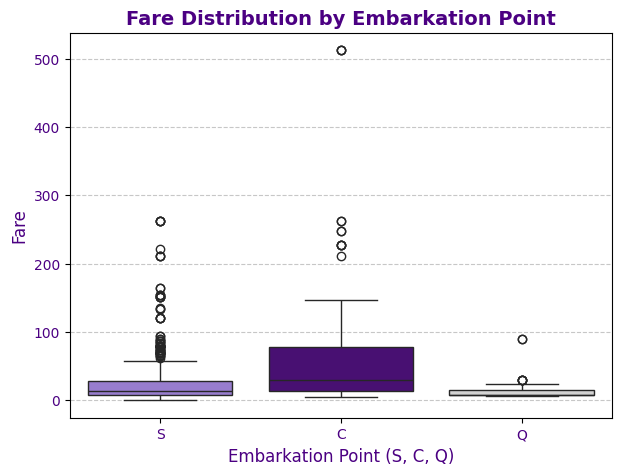

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot with a purple/gray theme
plt.figure(figsize=(7, 5))
sns.boxplot(x='Embarked', y='Fare', data=df, palette=['#9370DB', '#4B0082', '#D3D3D3'])  # Purple and gray theme
plt.title('Fare Distribution by Embarkation Point', fontsize=14, fontweight='bold', color='#4B0082')
plt.xlabel('Embarkation Point (S, C, Q)', fontsize=12, color='#4B0082')
plt.ylabel('Fare', fontsize=12, color='#4B0082')
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


The p-value is much less than the common significance level of 0.05 so will reject the null hypothesis, indicating that there is statistically significant evidence that at least one group mean is different from the others.

9.	Check for presence of collinearity and multi-collinearity and address it appropriately.

calculated the **Variance Inflation Factor (VIF)** for the numerical columns (excluding 'Survived') to check for multicollinearity between the features. A higher VIF value indicates a higher correlation with other features, and you printed the VIF values to identify potential multicollinearity in the dataset.

In [49]:
# Identify numeric columns, excluding the price column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Survived')

# Create an empty DataFrame to store VIF values
vif_data = pd.DataFrame()

# Assign the feature names (excluding price)
vif_data["feature"] = numeric_columns

# Calculate the VIF for each remaining numeric column
vif_data["VIF"] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(df[numeric_columns].shape[1])]

# Print the VIF values
print(vif_data)

  feature       VIF
0  Pclass  3.704638
1     Age  3.944568
2   SibSp  1.558133
3   Parch  1.547177
4    Fare  1.667827


<ipython-input-50-964ee77f6e0f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="feature", data=vif_data, palette='Purples')


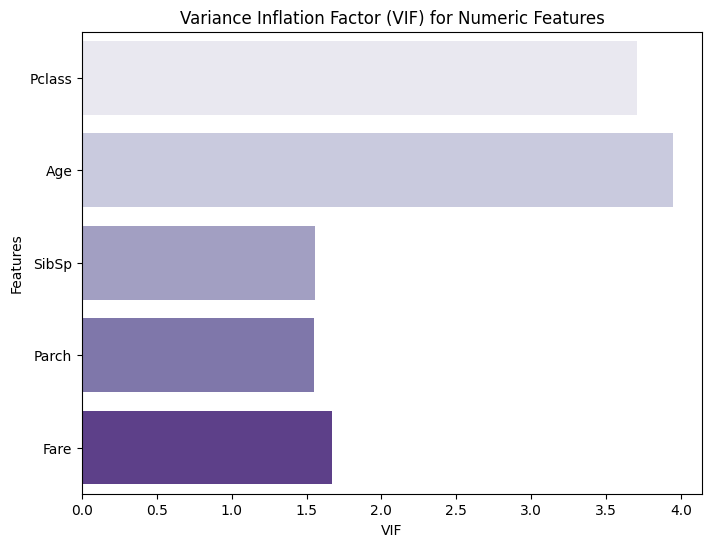

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns, excluding the price column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Survived')

# Create an empty DataFrame to store VIF values
vif_data = pd.DataFrame()

# Assign the feature names (excluding price)
vif_data["feature"] = numeric_columns

# Calculate the VIF for each remaining numeric column
vif_data["VIF"] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(df[numeric_columns].shape[1])]

# Plot the VIF values
plt.figure(figsize=(8, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, palette='Purples')
plt.title('Variance Inflation Factor (VIF) for Numeric Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()


The VIF results indicate the following:

Age (3.94) and Pclass (3.70) have the highest VIF values, which suggest moderate multicollinearity, meaning these variables may be somewhat correlated with other features in the dataset.
SibSp (1.55), Parch (1.55), and Fare (1.67) have lower VIF values, indicating little to no multicollinearity.

10.	Encode the data if required (if there are categorical independent variables).


In these steps:

1. The target variable **y** is defined as the 'Survived' column, which indicates if a passenger survived.
2. The independent variables **X** are selected by removing the 'Survived' column from the dataset.
3. **One-hot encoding** is applied to the categorical variables in **X** (like Sex and Embarked) to convert them into numerical format, creating separate columns for categories like 'Sex_male', 'Embarked_Q', and 'Embarked_S'.

In [52]:
#  Define independents variables (X) and outcome variable (y)
y=df["Survived"] # Target variable
X = df.drop(columns=['Survived'])  #independe variables
# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [53]:
X_encoded.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False


 **Result** I encoded the categorical columns into numerical ones using one-hot encoding. The new columns are now binary, such as **Sex_male and Embarked_Q/S**, where **True or False** indicates the presence of that category for each passenger. This allows the model to process categorical data in numerical form, making it ready for analysis.

11.	Split the dataset into training and testing subsets.
In this step, I split the dataset into two parts: **80% for training** the model and **20% for testing** it. This allows us to build the model using the training data and then evaluate its performance on the test data to ensure it works well on unseen data.


In [54]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


print(f'Train set shape: {X_train.shape}, Test set shape: {X_test.shape}')


Train set shape: (712, 8), Test set shape: (179, 8)


**result** same but use** bar chart**  for easier visulization

This bar chart shows the division of the dataset into two parts: the training set (used to teach the model) and the test set (used to evaluate the model). The larger bar represents the training set, which has around 700 samples, while the smaller bar represents the test set, with about 180 samples

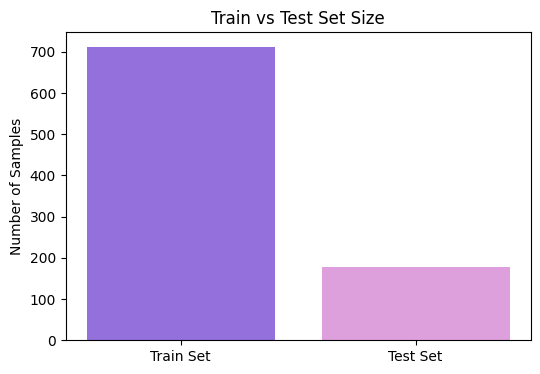

In [55]:
import matplotlib.pyplot as plt

# Define the sizes of the train and test sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]

# Create a bar chart to show the split
plt.figure(figsize=(6, 4))
plt.bar(['Train Set', 'Test Set'], [train_size, test_size], color=['#9370DB', '#DDA0DD'])  # Purple shades
plt.title('Train vs Test Set Size')
plt.ylabel('Number of Samples')
plt.show()


**12**.	Scale the training data and use the same scaler to also scale the test data. My key word 3 step **Initialize, fiting, Transformation**

In [60]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to transform X_test
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


     Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0 -1.614136  1.229207 -0.470722 -0.479342 -0.078684  0.724310   -0.303355   
1 -0.400551 -0.503505 -0.470722 -0.479342 -0.377145  0.724310   -0.303355   
2  0.813034  0.189580 -0.470722 -0.479342 -0.474867  0.724310   -0.303355   
3  0.813034 -0.272477  0.379923 -0.479342 -0.476230  0.724310   -0.303355   
4  0.813034 -1.812666  2.931860  2.048742 -0.025249 -1.380624   -0.303355   

   Embarked_S  
0    0.592489  
1    0.592489  
2    0.592489  
3    0.592489  
4    0.592489  
     Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0  0.813034  0.012390  0.379923  0.784700 -0.333901  0.724310   -0.303355   
1 -0.400551  0.112570 -0.470722 -0.479342 -0.425284  0.724310   -0.303355   
2  0.813034 -0.734533 -0.470722 -0.479342 -0.474867  0.724310   -0.303355   
3 -0.400551 -1.812666 -0.470722  0.784700  0.007966 -1.380624   -0.303355   
4  0.813034 -1.196590  0.379923 -0.479342 -0.411002 -1.3

**Result** This output shows the standardized (or scaled) values of the features in the Titanic dataset. Each feature, such as Pclass, Age, Fare, etc., has been transformed to have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, which is important for certain machine learning models that are sensitive to feature scales. The first few rows of the training and test sets are displayed, where values now reflect their position relative to the dataset's overall distribution.

13.	Select one categorical variable as the target. Conduct logistic regression and decision tree analysis to predict it and compare the performance of the two models.


## for the regression logistic and Decision Tree classifier  i used variable Survived as target mainroad


# logistic Regression

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [62]:
# Predictions for training
y_pred = logreg.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



"After training the Logistic Regression model, it achieved 80% accuracy. The model predicts class '0' (not survived) more accurately than class '1' (survived), which aligns with the **imbalance** in the dataset."

In [ ]:
# Predictions
predictions = logreg.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**This output** shows the **testing results** for the Logistic Regression model, used for comparing its performance with other models like Decision Tree. It includes metrics like precision, recall, f1-score, and accuracy to assess and compare model effectiveness.

# Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    criterion='gini',
    random_state=42
)

decision_tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [ ]:
# Predictions for training
y_pred = decision_tree.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       444
           1       0.90      0.61      0.73       268

    accuracy                           0.83       712
   macro avg       0.85      0.79      0.80       712
weighted avg       0.84      0.83      0.82       712



In [ ]:
# Predictions
predictions_decision_tree = decision_tree.predict(X_test_scaled)
print(classification_report(y_test, predictions_decision_tree))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



Our target data not balnced so we will not use accuracy as evaluation metric will foucs on pression or recal and ROC

Logistic Regression provides a more balanced performance between precision, recall, and f1-score across both classes, making it a slightly better model in this case.

Decision Tree has a higher recall for Class 0 but struggles with Class 1, resulting in less consistency across metrics.

If interpretability and balanced performance are priorities, logistic regression seems like the better option. If the focus is specifically on Class 0 (or similar problems where one class is more important), the decision tree might be preferred due to its higher recall for that clas

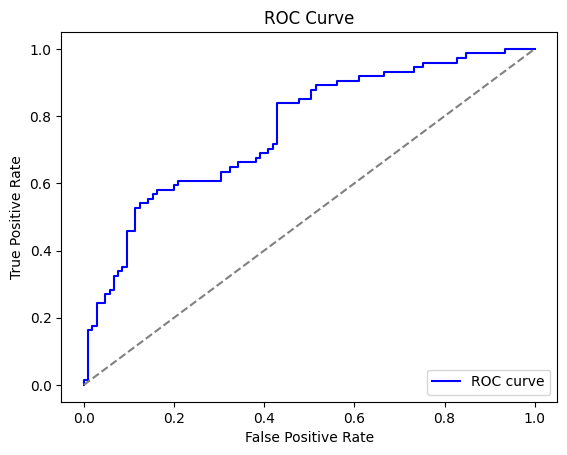

In [ ]:
# Get predicted probabilities for the test dataset
y_test_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
auc_score = auc(fpr, tpr)
print(f'AUC Score: {auc_score}')


AUC Score: 0.7598455598455597


#AUC Score Interpretation:

AUC = 0.5: The model is no better than random guessing.

AUC > 0.5 and < 0.7: The model has poor performance but is better than random guessing.

AUC between 0.7 and 0.8: This is considered acceptable or fair performance.

AUC between 0.8 and 0.9: Indicates good performance.

AUC > 0.9: Indicates excellent performance.

#Our AUC Score of 0.7598:

Indicates that the model's ability to discriminate between the positive and negative classes is fair or acceptable.
This means that around 75.98% of the time, the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance

Mounted at /content/drive


Q 14 Select one continuous variable as the target. Conduct Linear Regression and Regression Tree to predict it and compare the performance of the two models.
Check for validity of assumptions (LINE)
Check for overfitting and take steps to address it.


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert categorical columns to numerical using get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y_continuous) for regression
X = df_encoded.drop(columns=['Survived'])  # Assuming 'Survived' is the column for classification
y_continuous = df_encoded['Fare']  # Assuming 'Fare' is the continuous target variable

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin_reg = lin_reg.predict(X_test_reg_scaled)

# Decision Tree Regressor model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_reg, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg)

# Evaluate the models
lin_reg_mse = mean_squared_error(y_test_reg, y_pred_lin_reg)
tree_reg_mse = mean_squared_error(y_test_reg, y_pred_tree_reg)

print(f"Linear Regression MSE: {lin_reg_mse}")
print(f"Decision Tree Regression MSE: {tree_reg_mse}")


Linear Regression MSE: 1.7527696046061498e-28
Decision Tree Regression MSE: 0.226165897988827


In [76]:
# For logistic regression
log_reg_train_acc = accuracy_score(y_train, log_reg.predict(X_train_scaled))
log_reg_test_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
print(f"Logistic Regression Train Accuracy: {log_reg_train_acc}, Test Accuracy: {log_reg_test_acc}")

# For decision tree
tree_train_acc = accuracy_score(y_train, decision_tree.predict(X_train))
tree_test_acc = accuracy_score(y_test, decision_tree.predict(X_test))
print(f"Decision Tree Train Accuracy: {tree_train_acc}, Test Accuracy: {tree_test_acc}")

# Similarly, for regression models, compare training and testing MSE
lin_reg_train_mse = mean_squared_error(y_train_reg, lin_reg.predict(X_train_reg_scaled))
print(f"Linear Regression Train MSE: {lin_reg_train_mse}, Test MSE: {lin_reg_mse}")

tree_reg_train_mse = mean_squared_error(y_train_reg, tree_reg.predict(X_train_reg))
print(f"Decision Tree Regression Train MSE: {tree_reg_train_mse}, Test MSE: {tree_reg_mse}")


Logistic Regression Train Accuracy: 0.8019662921348315, Test Accuracy: 0.8100558659217877
Decision Tree Train Accuracy: 0.9803370786516854, Test Accuracy: 0.7932960893854749
Linear Regression Train MSE: 2.5347585538701947e-28, Test MSE: 1.7527696046061498e-28
Decision Tree Regression Train MSE: 2.8097629994950646e-30, Test MSE: 0.226165897988827
